In [15]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.path    as mpath
import matplotlib.patches as mpatches
from matplotlib.collections import LineCollection

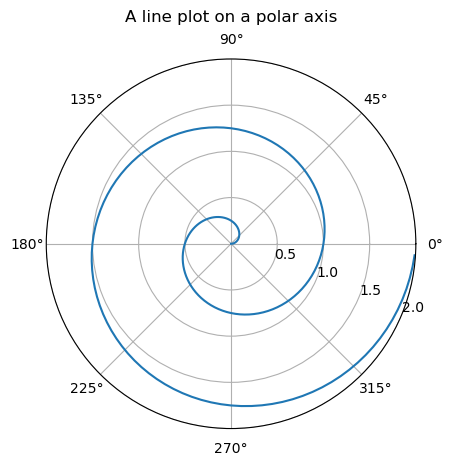

In [2]:
import numpy as np
import matplotlib.pyplot as plt

r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

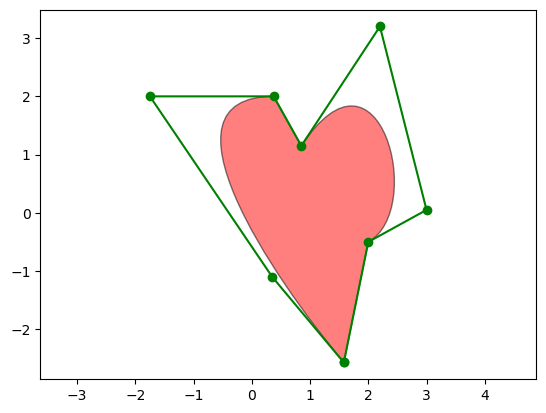

In [3]:
fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

# ax.grid()
ax.axis('equal')
plt.show()

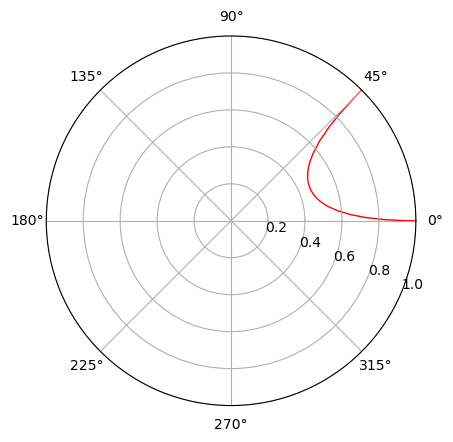

In [4]:
r = 1
degrees = np.arange(0, 2 * np.pi, np.pi / 8)  # (0, 22.5, 45, 67.5, ...)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
Path = mpath.Path
path_data = [
    (Path.MOVETO, (degrees[0], r)),
    (Path.CURVE3, (degrees[1], 0)),
    (Path.CURVE3, (degrees[2], r)),
]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='none', linewidth=1, edgecolor='r', alpha=1)
ax.add_patch(patch)

ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line

plt.show()

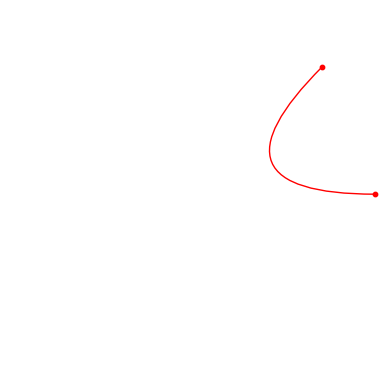

In [96]:
r = 1
degrees = np.arange(0, 2 * np.pi, np.pi / 8)  # (0, 22.5, 45, 67.5, ...)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
Path = mpath.Path
path_data = [
    (Path.MOVETO, (degrees[0], r)),
    (Path.CURVE3, (degrees[1], 0)),
    (Path.CURVE3, (degrees[2], r)),
]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='none', linewidth=1, edgecolor='r', alpha=1)
patch = ax.add_patch(patch)

for theta in degrees[:3:2]:
    ax.scatter(theta, r, c='r', s=10)

ax.set_axis_off()

plt.show()

In [97]:
verts = patch.get_verts()
verts.shape, verts

((25, 2),
 array([[328.        , 417.89268293],
        [332.42504819, 406.97652439],
        [341.27514457, 387.2570122 ],
        [350.12524094, 370.35457317],
        [358.97533732, 356.26920732],
        [367.8254337 , 345.00091463],
        [374.46300598, 338.39839939],
        [378.88805417, 334.87705793],
        [383.31310236, 332.05998476],
        [387.73815055, 329.94717988],
        [392.16319874, 328.53864329],
        [396.58824693, 327.834375  ],
        [401.01329512, 327.834375  ],
        [405.43834331, 328.53864329],
        [409.86339149, 329.94717988],
        [414.28843968, 332.05998476],
        [418.71348787, 334.87705793],
        [423.13853606, 338.39839939],
        [429.77610834, 345.00091463],
        [438.62620472, 356.26920732],
        [447.4763011 , 370.35457317],
        [456.32639748, 387.2570122 ],
        [465.17649386, 406.97652439],
        [469.60154204, 417.89268293],
        [328.        , 417.89268293]]))

In [106]:
route = verts[:-1]
idxs = np.array(range(route.shape[0]))  # (0, 1, 2, ..., N-1)
norm = plt.Normalize(idxs[0], idxs[-1])
segments = np.stack([route[:-1], route[1:]], axis=1)
# lc = LineCollection(segments, cmap=cmap, norm=norm)

In [101]:
vertices = []
for curve, code in patch.get_path().iter_bezier(simplify=False):
    # Get distance along the curve of any extrema
    _, dzeros = curve.axis_aligned_extrema()
    # Calculate vertices of start, end and any extrema in between
    vertices.append(curve([0, *dzeros, 1]))
vertices

[array([[0., 1.],
        [0., 1.]]),
 array([[0.        , 1.        ],
        [0.39269908, 0.5       ],
        [0.78539816, 1.        ]])]

In [95]:
ax.collections[0].get_paths()[0]

Path(array([[ 0.        , -0.5       ],
       [ 0.13260155, -0.5       ],
       [ 0.25978994, -0.44731685],
       [ 0.35355339, -0.35355339],
       [ 0.44731685, -0.25978994],
       [ 0.5       , -0.13260155],
       [ 0.5       ,  0.        ],
       [ 0.5       ,  0.13260155],
       [ 0.44731685,  0.25978994],
       [ 0.35355339,  0.35355339],
       [ 0.25978994,  0.44731685],
       [ 0.13260155,  0.5       ],
       [ 0.        ,  0.5       ],
       [-0.13260155,  0.5       ],
       [-0.25978994,  0.44731685],
       [-0.35355339,  0.35355339],
       [-0.44731685,  0.25978994],
       [-0.5       ,  0.13260155],
       [-0.5       ,  0.        ],
       [-0.5       , -0.13260155],
       [-0.44731685, -0.25978994],
       [-0.35355339, -0.35355339],
       [-0.25978994, -0.44731685],
       [-0.13260155, -0.5       ],
       [ 0.        , -0.5       ],
       [ 0.        , -0.5       ]]), array([ 1,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        

In [87]:
ax.spines.

In [37]:
iter_seg = path.iter_segments(curves=False)
i = 0

In [42]:
i += 1
print(f'{i}: ', next(iter_seg))

StopIteration: 

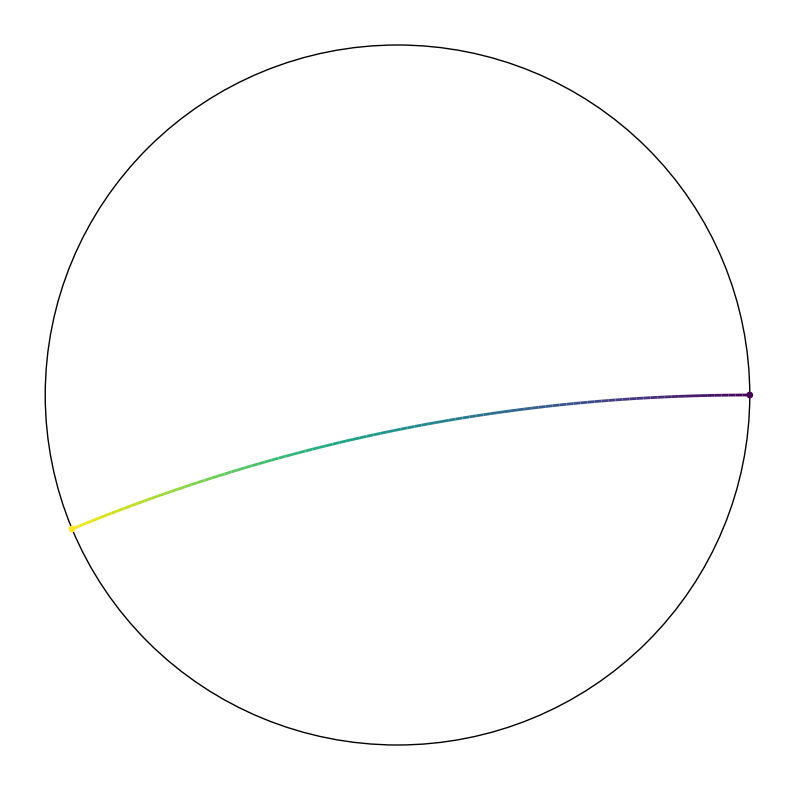

In [30]:
r = 1
degrees = np.arange(0, 2 * np.pi, np.pi / 8)  # (0, 22.5, 45, 67.5, ...)

fig, ax = plt.subplots(figsize=(10, 10))

# convert from polar coordinates to cartesian coordinates
X = r * np.cos(degrees[[0, 9]])
Y = r * np.sin(degrees[[0, 9]])

# compute the quadratic Bezier curve
t = np.linspace(0, 1, 100)
x = (1-t)**2 * X[0] + t**2 * X[1]
y = (1-t)**2 * Y[0] + t**2 * Y[1]

# split the curve into segments
route = np.stack([x, y], axis=1)
idxs = np.array(range(route.shape[0]))  # (0, 1, 2, ..., N-1)
norm = plt.Normalize(idxs[0], idxs[-1])
segments = np.stack([route[:-1], route[1:]], axis=1)

cmap = mpl.colormaps['viridis']
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(idxs)
lc.set_linewidth(2)
line = ax.add_collection(lc)

# draw the outer circle
circle = mpatches.Circle((0, 0), r, color='black', fill=False)
ax.add_artist(circle)

# draw two ends
cmap_ends = [cmap.colors[i] for i in [0, -1]]
ax.scatter(X, Y, c=cmap_ends, s=15)

ax.set_axis_off()
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

plt.show()

In [22]:
cmap.colors[0] + cmap.colors[-1]

[0.267004, 0.004874, 0.329415, 0.993248, 0.906157, 0.143936]

(0.0, 1.0)

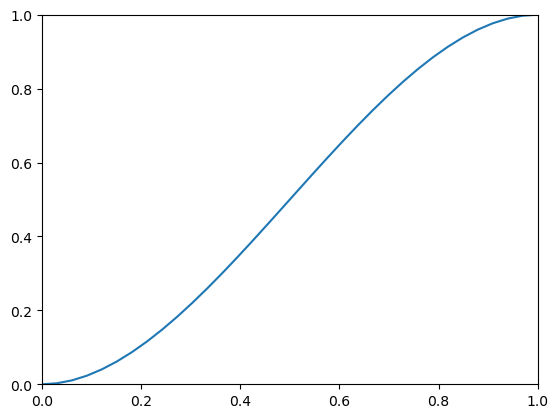

In [19]:
X = [0, 1/3, 2/3, 1]
Y = [0, 0, 1, 1]
t = np.linspace(0, 1, 34)
x = (1-t)**3 * X[0] + 3*t*(1-t)**2 * X[1] + 3*t**2*(1-t) * X[2] + t**3 * X[3]
y = (1-t)**3 * Y[0] + 3*t*(1-t)**2 * Y[1] + 3*t**2*(1-t) * Y[2] + t**3 * Y[3]
plt.plot(x, y)
plt.xlim(0, 1)
plt.ylim(0, 1)